additional pacakge needed: wordcloud, gensim, seaborn(?), PIL

# importing the dataframe

In [1]:
import pandas as pd
import numpy as np

In [2]:
vs_sentences_df = pd.read_csv('./labels0.csv',index_col=0)

In [3]:
vs_sentences_df = vs_sentences_df.drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1'])

In [4]:
vs_sentences_df.head()

,id,thread_title,reply_split,classification
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,"Hi stao, the response of the T64fx changes dep...",0
1,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Usually I have a Primorac Carbon and I'm offen...,0
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,1
3,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,2
4,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,Very good for block.,4


In [5]:
all_and_or_sentences_df = pd.read_csv('../output/and_or_labels0.csv',index_col=0)

In [6]:
all_and_or_sentences_df.head()

,Unnamed: 0.1,id,thread_title,reply_split,classification
0,0,5f6c218829a893d240caed5e,Inverted Rubber review format / proforma - PLE...,"This is a great idea, it will make it easier f...",-1
1,1,5f6c218829a893d240caed5e,Inverted Rubber review format / proforma - PLE...,"Thus, it will be easier to compare different e...",-1
2,2,5f6c218829a893d240caed5e,Inverted Rubber review format / proforma - PLE...,"All for it,It would make comparisons much easi...",-1
3,3,5f6c218829a893d240caed5e,Inverted Rubber review format / proforma - PLE...,Excellent haggisv.,-1
4,4,5f6c218829a893d240caed5e,Inverted Rubber review format / proforma - PLE...,Some consistency at last in how reviews are do...,-1


In [7]:
all_and_or_sentences_df = all_and_or_sentences_df.drop(columns=['Unnamed: 0.1'])

- direct comparative is 1
- 2 is comparative but entity needs to be inferred
- 3,4 are non-comparative but it still says some attributes about the rubber
- 0 is rubbish
- -2 is not looked
- 5 is confused
- -1 is unlabelled

In [8]:
comp_sentences_vs_df = vs_sentences_df[vs_sentences_df['classification'].isin([1,2])]

In [9]:
comp_sentences_vs_df.head()

,id,thread_title,reply_split,classification
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,1
3,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,2
5,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,For my style I really prefer T64fx than T05fx ...,1
42,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you loop everything and are active in the s...,2
43,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you block more and are a bit more passive i...,2


In [10]:
comp_sentences_and_or_df = all_and_or_sentences_df[all_and_or_sentences_df['classification'].isin([1,2])]

In [11]:
comp_sentences_and_or_df.head()

,id,thread_title,reply_split,classification
176,5f6c21e6035f29fdaf67ffa7,Are Tenergy/Dignics rubbers really the best?,"OK, so maybe it produces a little more spin th...",2
177,5f6c21e6035f29fdaf67ffa7,Are Tenergy/Dignics rubbers really the best?,Oh yeah.. the now defunct Three Sword Red Drag...,2
185,5f6c21e6035f29fdaf67ffa7,Are Tenergy/Dignics rubbers really the best?,Maybe for the pro - Hurricane and Tenergy are ...,1
188,5f6c21e6035f29fdaf67ffa7,Are Tenergy/Dignics rubbers really the best?,"Yes, they have more powerful spin and speedier...",2
189,5f6c21e6035f29fdaf67ffa7,Are Tenergy/Dignics rubbers really the best?,But they sacrifice on control.,2


In [12]:
comp_sentences_df = pd.concat([comp_sentences_vs_df,comp_sentences_and_or_df],ignore_index=True)

In [13]:
comp_sentences_df.head()

,id,thread_title,reply_split,classification
0,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,I used T05fx before and I really appreciate th...,1
1,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,On the other hand less spin too.,2
2,5f686bc7b59794ca78c70902,Tenergy 05FX vs Tenergy 64FX,For my style I really prefer T64fx than T05fx ...,1
3,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you loop everything and are active in the s...,2
4,5f686bdbb59794ca78c7090b,Tenergy 05 vs Tenergy 80,If you block more and are a bit more passive i...,2


In [14]:
comp_sentences_df.shape

(230, 4)

In [15]:
comp_sentences_df.nunique()

id                 40
thread_title       38
reply_split       200
classification      2
dtype: int64

In [16]:
comp_sentences_df.isnull().sum()

id                0
thread_title      0
reply_split       0
classification    0
dtype: int64

In [62]:
comp_sentences_df['reply_split'][:2]

0    I used T05fx before and I really appreciate th...
1                     On the other hand less spin too.
Name: reply_split, dtype: object

# counting and most frequency word / bigram / trigram

In [17]:
# code modified from this blog:
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools?utm_source=medium&utm_medium=crosspost&utm_campaign=blog-exploratory-data-analysis-natural-language-processing-tools

In [51]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
# from wordcloud import STOPWORDS
def get_stopwords():
    # stop = set(STOPWORDS)
    stop = stopwords.words('english')
    custom_words_sen = 'really, like, way, much , still, but, find, need, you, many, lot, always, say, could, well, even, the'

    custom_words = custom_words_sen.split(', ')

    custom_stop = stop + custom_words
    return custom_stop

In [52]:
corpus=[]

custom_stop = get_stopwords()

threads = comp_sentences_df['reply_split'].str.split()

# let's actually make all word lowercase
stop = get_stopwords()

for thread in threads:
    for word in thread:
        corpus.append(str.lower(word)) # make lowercase

print(corpus[:5])

['i', 'used', 't05fx', 'before', 'and']


In [55]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:100]:
    if (word not in custom_stop):
        x.append(word)
        y.append(count)

In [57]:
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 10 artists>

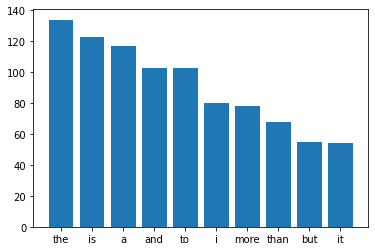

In [58]:
# looking at the top stop words

import matplotlib.pyplot as plt

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

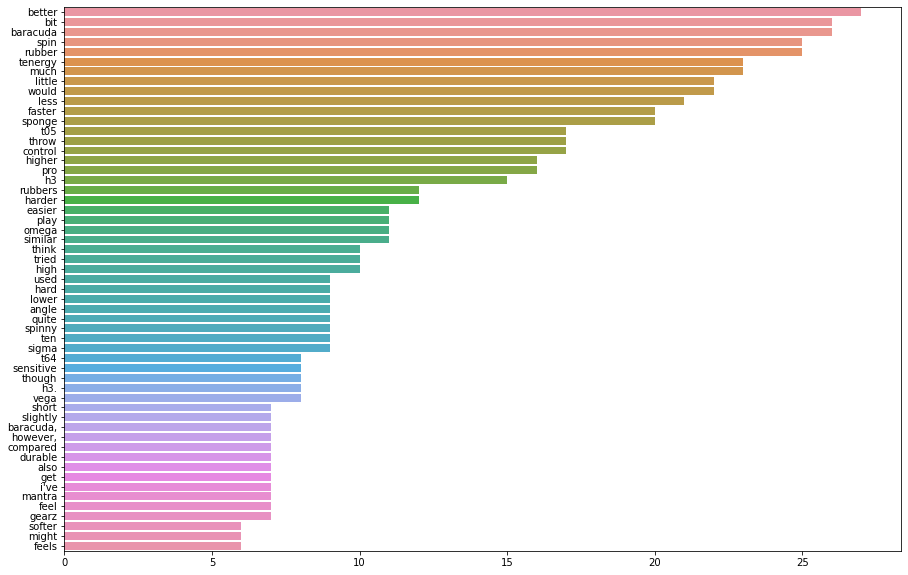

In [60]:
# looking at the top word that is NOT a stopword

from collections import Counter
import seaborn as sns

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:100]:
    if (word not in custom_stop):
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(15,10))
ax = sns.barplot(x=y,y=x)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def get_top_ngram(corpus=comp_sentences_df['reply_split'], n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:50]

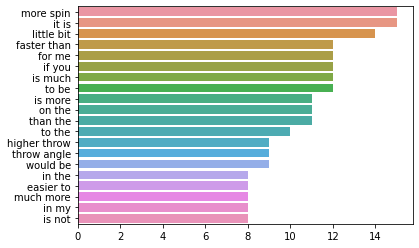

In [23]:
# looking at top bigram

top_n_bigrams=get_top_ngram(comp_sentences_df['reply_split'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

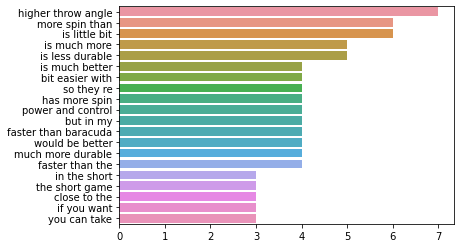

In [24]:
# looking at top trigram

top_tri_grams=get_top_ngram(comp_sentences_df['reply_split'],3)[:20]
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

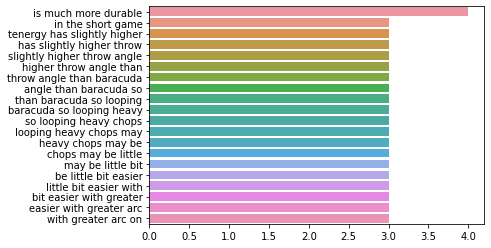

In [25]:
# looking at top 4-gram

top_tri_grams=get_top_ngram(comp_sentences_df['reply_split'],4)[:20]
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [108]:
corpus_lc

[['used',
  't05fx',
  'appreciate',
  'general',
  'feeling',
  't64fx',
  'softer',
  'faster',
  '05fx'],
 ['hand', 'le', 'spin'],
 ['for', 'style', 'prefer', 't64fx', 't05fx', '2.1'],
 ['loop',
  'everything',
  'active',
  'short',
  'game',
  'spin',
  'manipulation',
  'tenergy'],
 ['block',
  'bit',
  'passive',
  'short',
  'game',
  'linear',
  'precision',
  't64',
  't80',
  'might',
  'liking'],
 ['think', 't25fx', 'better', 't64', 'blocking', 'short', 'game'],
 ['hard', 'sponge', 't05', 'favorite'],
 ['the', 'sponge', 't05', 't80', 't64', 't25'],
 ['t64',
  'longer',
  'thinner',
  'pimple',
  'space',
  'pimple',
  'pip',
  'give',
  'rubber',
  'feel',
  'softer'],
 ['t05',
  'pimple',
  'little',
  'shorter',
  'thicker',
  'closer',
  'together',
  'rubber',
  'feel',
  'harder'],
 ['t05', 'slower', 'more', 'spin', 'higher', 'throw', 'angle'],
 ['t64', 'faster', 'le', 'spin', 'lower', 'throw', 'angle'],
 ['but', 't80', 'le', 'sensitive', 'etc'],
 ['t80',
  'little',
 

# Wordcloud

In [20]:
def preprocess_news(df,lowercase=False):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    stop = get_stopwords()
    for threads in df:
        if lowercase == True:
            words=[str.lower(w) for w in word_tokenize(threads) if (w not in stop)]
        else:
            words=[w for w in word_tokenize(threads) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

corpus_lc = preprocess_news(comp_sentences_df['reply_split'],lowercase=True)

In [40]:
corpus_lc[:1]

[['used',
  't05fx',
  'appreciate',
  'general',
  'feeling',
  't64fx',
  'softer',
  'faster',
  '05fx']]

In [26]:
from wordcloud import WordCloud

In [27]:
# see LDA session for the preprocess_news function - basically some stemming and lemmitization

corpus_normal =preprocess_news(comp_sentences_df['reply_split'], lowercase = False)
corpus_lowercase =preprocess_news(comp_sentences_df['reply_split'], lowercase = True)

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
# code modified from blog above for customizing wordcloud

mask = np.array(Image.open('./imgs/ping_pong_paddle.jpg'))

custom_stop = get_stopwords()

def show_wordcloud_custom_shape(data,n_max_words=100,img_mask = []):
    if len(img_mask) == 0:
        wordcloud = WordCloud(
            background_color='white',
            stopwords=custom_stop, #stopwords = set(STOPWORDS)
            max_words=n_max_words,
            max_font_size=30,
            scale=3,
            random_state=1)
    else:
        wordcloud = WordCloud(
            background_color='white',
            stopwords=custom_stop,
            max_words=n_max_words,
            max_font_size=30,
            scale=3,
            random_state=1,mask=img_mask,
            width=mask.shape[1],
            height=mask.shape[0])
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
    


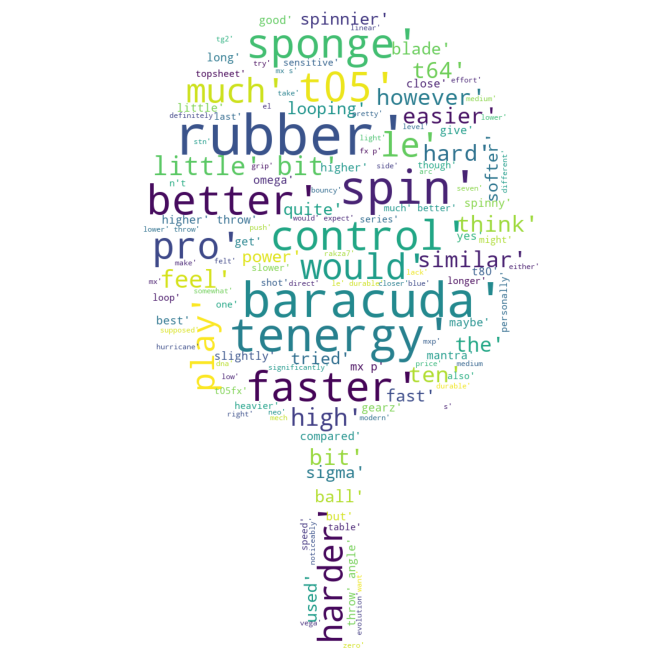

In [34]:
show_wordcloud_custom_shape(corpus_lowercase,500,mask)

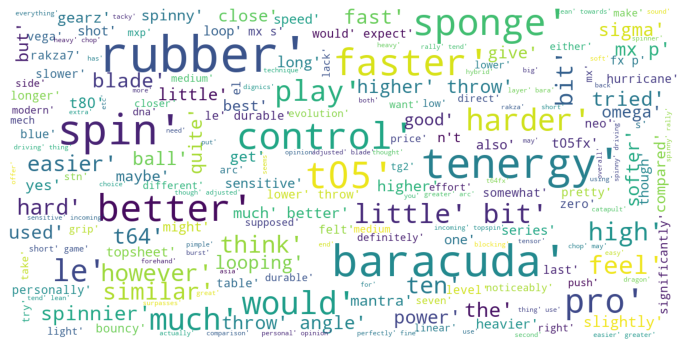

In [35]:
show_wordcloud_custom_shape(corpus_lowercase,500)

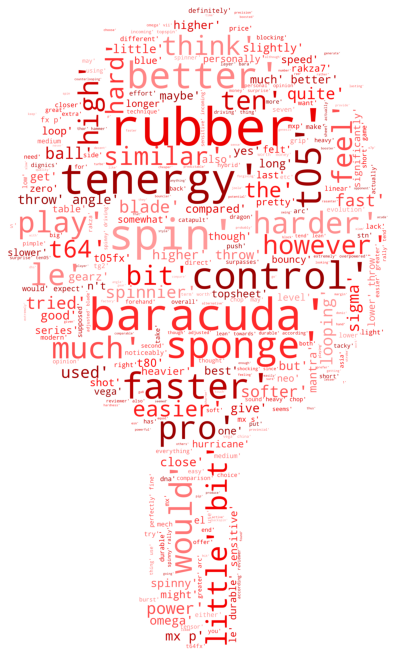

In [37]:
mask = np.array(Image.open('./imgs/ping_pong_paddle_2.jpg'))


# red color scheme

def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 0 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(30, 80) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

data = corpus_lowercase
n_max_words = 300
img_mask = mask

wordcloud = WordCloud(
            background_color='white',
            stopwords=custom_stop,
            max_words=n_max_words,
            max_font_size=120,
            scale=5,
            random_state=1,
            mask=img_mask,
            width=mask.shape[1],
            height=mask.shape[0],
            color_func=similar_color_func)
   
wordcloud2 =wordcloud.generate(str(data))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud2)
plt.show()

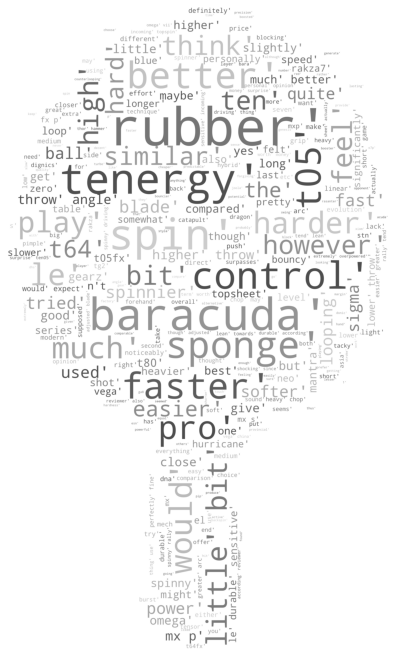

In [38]:
# black color scheme

def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 0 # 0 - 360
    s = 0 # 0 - 100
    l = random_state.randint(30, 80) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

data = corpus_lowercase
n_max_words = 300
img_mask = mask

wordcloud = WordCloud(
            background_color='white',
            stopwords=custom_stop,
            max_words=n_max_words,
            max_font_size=120,
            scale=5,
            random_state=1,
            mask=img_mask,
            width=mask.shape[1],
            height=mask.shape[0],
            color_func=similar_color_func)
   
wordcloud2 =wordcloud.generate(str(data))

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud2)
plt.show()

# clustering

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [91]:
import itertools

chain_object = itertools.chain.from_iterable(corpus_lc)

sentences_array = list(chain_object)

# sentences_arr = comp_sentences_df['reply_split'].values.astype('U')

In [92]:


tf_idf_vectorizor = TfidfVectorizer(stop_words = custom_stop,#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(sentences_array)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

/home/eyan/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['much'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


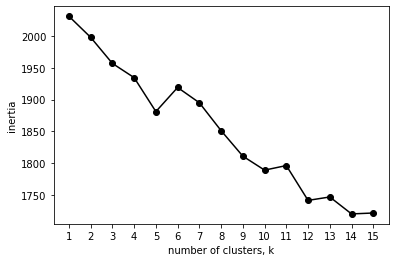

In [97]:
ks = range(1, 16)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(tf_idf_array) 
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [98]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(tf_idf_array)

#print("Top terms per cluster:")

# argsort with desc - so the first few terms are the top terms
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vectorizor.get_feature_names()

cluster_terms = []

for i in range(k):
    # print("Cluster %d:" % i),
    cluster_i = []
    for ind in order_centroids[i, :]:
        cluster_i.append(terms[ind])
        # print(' %s' % terms[ind]),
    cluster_terms.append(cluster_i)
    #print()

In [99]:
# get the top 20 terms for each cluster

for idx,val in enumerate(cluster_terms):
    print("Cluster %d:" % idx)
    for ind in val[:20]: # top 20
        print(' %s' % ind)
    print()

Cluster 0:
 rubber
 baracuda
 spin
 tenergy
 better
 bit
 sponge
 control
 faster
 t05
 throw
 much
 would
 little
 le
 pro
 mx
 higher
 harder
 play

Cluster 1:
 heavy
 little
 pro
 would
 sensitive
 t64
 hard
 omega
 high
 angle
 speed
 level
 mech
 dragon
 tensor
 tek
 lacking
 extra
 flex
 flat

Cluster 2:
 worth
 close
 zlc
 feeling
 flick
 flex
 flat
 fit
 fine
 finally
 fextra
 felt
 feel
 forehand
 favorite
 faster
 fastarc
 fast
 far
 fan

Cluster 3:
 try
 zlc
 fastarc
 fine
 finally
 fextra
 felt
 feeling
 feel
 favorite
 faster
 fast
 flat
 far
 fan
 familiar
 factory
 extremely
 extreme
 extra

Cluster 4:
 spinnier
 faster
 better
 spin
 pro
 would
 tenergy
 little
 sensitive
 high
 t64
 hard
 omega
 angle
 level
 speed
 close
 stroke
 overall
 ga8



In [100]:
import os
import re

from gensim.models import Word2Vec
from tqdm import tqdm

# https://www.kaggle.com/chewzy/tutorial-how-to-train-your-custom-word-embedding

word2vec_model = Word2Vec(sentences=corpus_lowercase, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [101]:
len(word2vec_model.wv.vocab.keys())

749

In [104]:
print(word2vec_model.wv.vocab.keys())

dict_keys(['used', 't05fx', 'appreciate', 'general', 'feeling', 't64fx', 'softer', 'faster', '05fx', 'hand', 'le', 'spin', 'for', 'style', 'prefer', '2.1', 'loop', 'everything', 'active', 'short', 'game', 'manipulation', 'tenergy', 'block', 'bit', 'passive', 'linear', 'precision', 't64', 't80', 'might', 'liking', 'think', 't25fx', 'better', 'blocking', 'hard', 'sponge', 't05', 'favorite', 'the', 't25', 'longer', 'thinner', 'pimple', 'space', 'pip', 'give', 'rubber', 'feel', 'little', 'shorter', 'thicker', 'closer', 'together', 'harder', 'slower', 'more', 'higher', 'throw', 'angle', 'lower', 'but', 'sensitive', 'etc', 'control', 'spinnier', 'like', 'others', 'forehand', 'after', 'testing', 'dignics', 'zlc', 'blade', 'end', 'last', 'season', 'back', 'primorac', 'carbon', 'time', 't80fx', 'combination', 'looking', 'yes', 'matter', 'getting', 'knowing', 'work', 'forgiving', 'much', 'flick', 'would', 'suggest', 'speed', 'slow', 'suited', 'maybe', 'close', 'table', 'easier', 'take', '1.9mm',

In [105]:
word2vec_model.wv.most_similar('fast')

[('ten64', 0.4511820077896118),
 ('hammerspeed', 0.3346877098083496),
 ('replace', 0.3311111032962799),
 ('lacking', 0.3262651562690735),
 ('flat', 0.32173311710357666),
 ('faster/spinnier', 0.32080841064453125),
 ('thought', 0.32011836767196655),
 ('properly', 0.31971096992492676),
 ('recommend', 0.3153749704360962),
 ('world', 0.3051835596561432)]

In [123]:
word2vec_model.wv.most_similar('spinnier')

[('back', 0.42342591285705566),
 ('bear', 0.40404120087623596),
 ('suitable', 0.40252918004989624),
 ('tiny', 0.37814319133758545),
 ('el-p', 0.377291738986969),
 ('rubber.what', 0.36536717414855957),
 ('would', 0.36129969358444214),
 ('thibar', 0.35683101415634155),
 ('cope', 0.34827202558517456),
 ('nitakku', 0.3397153615951538)]

In [125]:
word2vec_model.wv.most_similar('hard')

[('both', 0.4160914421081543),
 ('thor', 0.40668633580207825),
 ('softer', 0.3684960901737213),
 ('approved.afaik', 0.3676508665084839),
 ('serving', 0.36127519607543945),
 ('intended', 0.35431036353111267),
 ('adjust', 0.3514466881752014),
 ('appreciate', 0.34885716438293457),
 ('smaller', 0.3404482901096344),
 ('comparing', 0.3372204005718231)]

In [127]:
word2vec_model.wv.most_similar('faster')

[('extremely', 0.524039626121521),
 ('softer', 0.43041834235191345),
 ('wiped', 0.408677339553833),
 ('because', 0.4083767533302307),
 ('game', 0.3903488516807556),
 ('angle', 0.3834186792373657),
 ('stiffer', 0.36534571647644043),
 ('kokutaku', 0.3550364375114441),
 ('bty', 0.3257879614830017),
 ('shot', 0.3225819170475006)]

# others

In [115]:
import itertools

chain_object = itertools.chain.from_iterable(corpus_lc)

sentences_array = list(chain_object)

In [117]:
sentences_array[:10]

['used',
 't05fx',
 'appreciate',
 'general',
 'feeling',
 't64fx',
 'softer',
 'faster',
 '05fx',
 'hand']

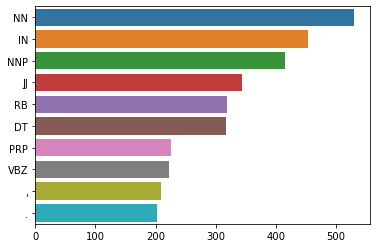

In [137]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=comp_sentences_df['reply_split'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

In [ ]:
# noun (NN) dominate followed by preposition/subordinating conjunction (IN)
# https://pythonprogramming.net/part-of-speech-tagging-nltk-tutorial/

In [202]:
def plot_top_tagged(df_col=comp_sentences_df['reply_split'],tagged=None,i=None):

    def get_top_tagged(text,tagged):
        adj=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==tagged:
                adj.append(word)
        return adj


    words=df_col.apply(lambda x : get_top_tagged(x,tagged))
    words=[x for l in words for x in l]
    counter=Counter(words)

    x,y=list(map(list,zip(*counter.most_common(20))))
    if i==None:
        sns.barplot(x=y,y=x)
    else:
        sns.barplot(x=y,y=x,ax=axes[i//2][i%2]).set_title(tagged)

In [203]:
tag_lists = ['NN','IN','NNP','JJ','RB','DT','PRP','VBZ','JJR','JJS','RBR','RBS']

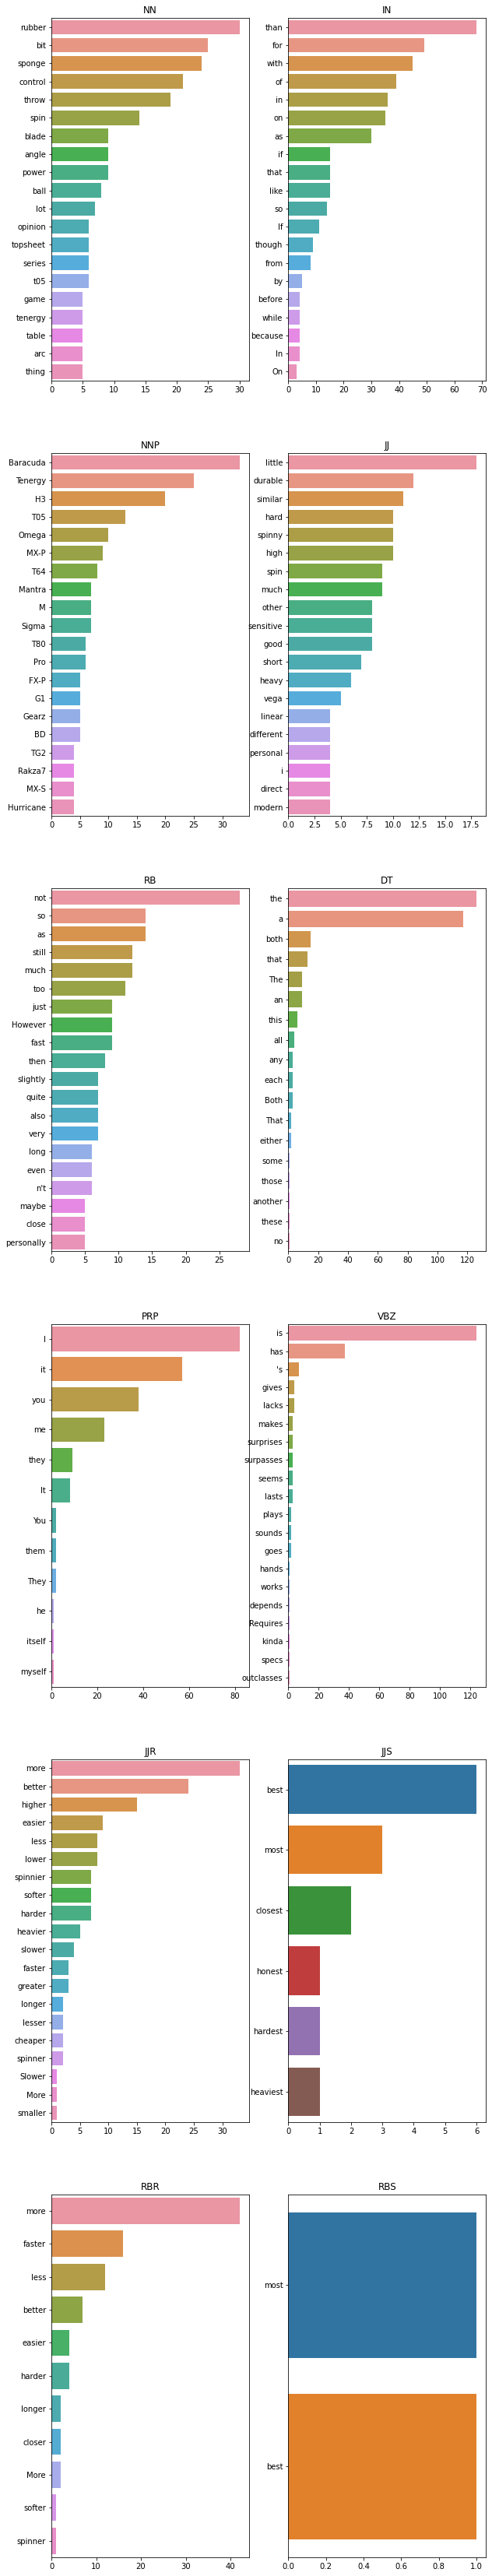

In [204]:
f, axes = plt.subplots(6, 2,figsize=(10,60))
for idx,tagged in enumerate(tag_lists):

    plot_top_tagged(comp_sentences_df['reply_split'],tagged=tagged,i=idx)

In [ ]:
#  RBR is useful, JJR also useful

# looking at only 'er'

In [122]:
sentences_array

['used',
 't05fx',
 'appreciate',
 'general',
 'feeling',
 't64fx',
 'softer',
 'faster',
 '05fx',
 'hand',
 'le',
 'spin',
 'for',
 'style',
 'prefer',
 't64fx',
 't05fx',
 '2.1',
 'loop',
 'everything',
 'active',
 'short',
 'game',
 'spin',
 'manipulation',
 'tenergy',
 'block',
 'bit',
 'passive',
 'short',
 'game',
 'linear',
 'precision',
 't64',
 't80',
 'might',
 'liking',
 'think',
 't25fx',
 'better',
 't64',
 'blocking',
 'short',
 'game',
 'hard',
 'sponge',
 't05',
 'favorite',
 'the',
 'sponge',
 't05',
 't80',
 't64',
 't25',
 't64',
 'longer',
 'thinner',
 'pimple',
 'space',
 'pimple',
 'pip',
 'give',
 'rubber',
 'feel',
 'softer',
 't05',
 'pimple',
 'little',
 'shorter',
 'thicker',
 'closer',
 'together',
 'rubber',
 'feel',
 'harder',
 't05',
 'slower',
 'more',
 'spin',
 'higher',
 'throw',
 'angle',
 't64',
 'faster',
 'le',
 'spin',
 'lower',
 'throw',
 'angle',
 'but',
 't80',
 'le',
 'sensitive',
 'etc',
 't80',
 'little',
 'bit',
 'control',
 'le',
 'sensiti

In [120]:
import re

r = re.compile(".*er$")

er_list = list(filter(r.match, sentences_array)) # Read Note
print(er_list)

['softer', 'faster', 'prefer', 'better', 'longer', 'thinner', 'rubber', 'softer', 'shorter', 'thicker', 'closer', 'together', 'rubber', 'harder', 'slower', 'higher', 'faster', 'lower', 'spinnier', 'after', 'better', 'matter', 'rubber', 'better', 'softer', 'easier', 'better', 'higher', 'better', 'never', 'rubber', 'offer', 'higher', 'easier', 'greater', 'however', 'however', 'power', 'harder', 'faster', 'better', 'rubber', 'higher', 'heavier', 'layer', 'reviewer', 'better', 'rubber', 'rubber', 'however', 'better', 'power', 'higher', 'easier', 'greater', 'however', 'however', 'power', 'faster', 'better', 'rubber', 'higher', 'heavier', 'layer', 'reviewer', 'better', 'rubber', 'rubber', 'however', 'better', 'power', 'higher', 'easier', 'greater', 'however', 'however', 'power', 'faster', 'better', 'rubber', 'higher', 'heavier', 'layer', 'reviewer', 'better', 'rubber', 'rubber', 'however', 'better', 'power', 'either', 'rubber', 'better', 'grippier', 'softer', 'better', 'heavier', 'harder', '

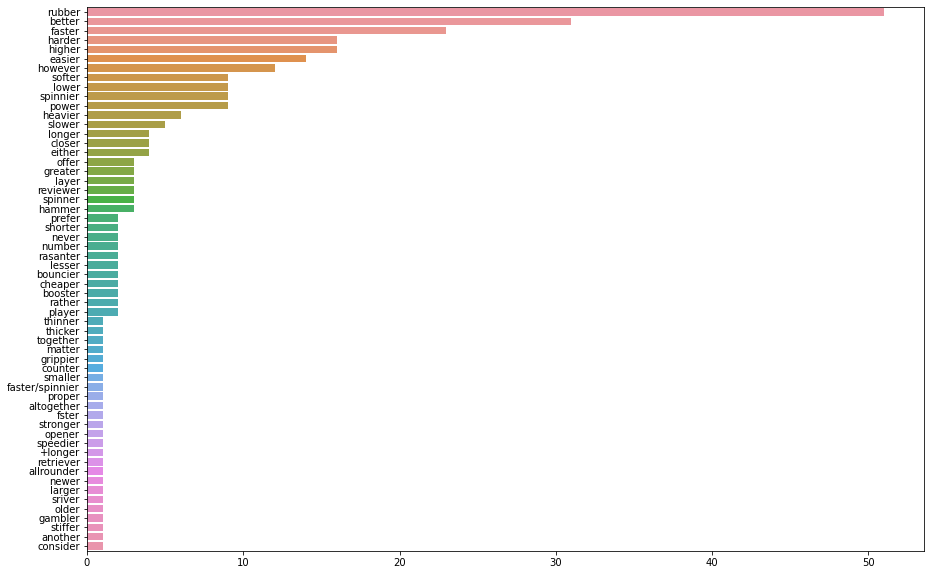

In [121]:
# looking at the top word that is NOT a stopword

from collections import Counter
import seaborn as sns

counter=Counter(er_list)
most=counter.most_common()

x, y= [], []
for word,count in most[:100]:
    if (word not in custom_stop):
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(15,10))
ax = sns.barplot(x=y,y=x)

* speed : faster, spinnier (has more spin, has less spin), slower, spiny
* throw angle / arc: higher, lower
* hardness: softer, harder, stiffer
* texture: thinner, thicker, bouncy, bouncier
* price: cheaper
* durability: more durable

* other words: throw, flex, flick, flat, springy, chopping